In [49]:
import torch
import numpy as np
import pandas as pd
# from tqdm import tqdm 
# import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from torch import nn,optim
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

# sns.set(style='whitegrid', palette='muted', font_scale=1.2)
# rcParams['figure.figure_size']=12,6
random_seed=123
np.random.seed(random_seed)
torch.manual_seed(random_seed)

""
import os
from pathlib import Path
print(os.getcwd())

main=Path('C:/Users/hiwuq/OneDrive/Qian Learning/ML/Datasets')

raw=pd.read_csv(main/'weatherAUS.csv')

print(raw.shape)

display(raw.head(5))


C:\Users\hiwuq
(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [96]:
xcols=['Rainfall','Humidity3pm','Pressure9am','RainToday']
ycol='RainTomorrow'

df=raw[xcols+[ycol]]

df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)
df['RainToday'].replace({'No':0,'Yes':1},inplace=True)

print(df.isna().sum()/df.shape[0])

df=df.dropna(how='any')
print(df.shape)

display(df.head(10))

print(df[ycol].value_counts()/df.shape[0])

trainX,testX,trainy,testy=train_test_split(df[xcols],df[ycol], test_size=0.25, random_state=random_seed)

print(testX.shape, trainX.shape)

Rainfall        0.022419
Humidity3pm     0.030984
Pressure9am     0.103568
RainToday       0.022419
RainTomorrow    0.022460
dtype: float64
(124689, 5)


C:\Users\hiwuq\AppData\Local\Temp\ipykernel_18568\505042273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)
C:\Users\hiwuq\AppData\Local\Temp\ipykernel_18568\505042273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'].replace({'No':0,'Yes':1},inplace=True)


,Rainfall,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,0.6,22.0,1007.7,0.0,0.0
1,0.0,25.0,1010.6,0.0,0.0
2,0.0,30.0,1007.6,0.0,0.0
3,0.0,16.0,1017.6,0.0,0.0
4,1.0,33.0,1010.8,0.0,0.0
5,0.2,23.0,1009.2,0.0,0.0
6,0.0,19.0,1009.6,0.0,0.0
7,0.0,19.0,1013.4,0.0,0.0
8,0.0,9.0,1008.9,0.0,1.0
9,1.4,27.0,1007.0,1.0,0.0


0.0    0.778762
1.0    0.221238
Name: RainTomorrow, dtype: float64
(31173, 4) (93516, 4)


In [97]:
trainX=torch.from_numpy(trainX.to_numpy()).float()
trainy=torch.squeeze(torch.from_numpy(trainy.to_numpy())).float()

testX=torch.from_numpy(testX.to_numpy()).float()
testy=torch.squeeze(torch.from_numpy(testy.to_numpy())).float()

print(trainX.shape, trainy.shape)

torch.Size([93516, 4]) torch.Size([93516])


In [103]:
class MyNet(nn.Module):
    
    def __init__(self,n_features):
        super(MyNet, self).__init__()
        self.fc1=nn.Linear(n_features,5)
        self.fc2=nn.Linear(5,3)
        self.fc3=nn.Linear(3,1)
        
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))
    

net=MyNet(trainX.shape[1])


D:\Softwares\Anaconda3\envs\tfenv\lib\site-packages\torch\nn\functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


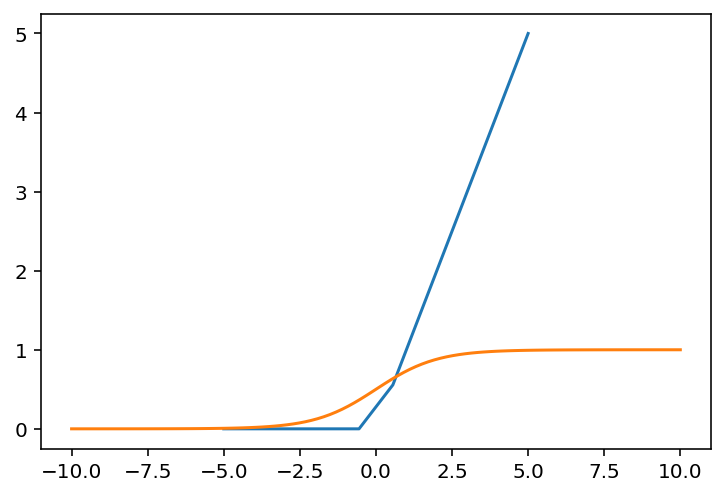

In [99]:
## show activate functions:
plt.plot(np.linspace(-5,5,10), F.relu(torch.linspace(-5,5,steps=10)).numpy())

plt.plot(np.linspace(-10,10,100), F.sigmoid(torch.linspace(-10,10,steps=100)).numpy())


## loss function
LossFunc=nn.BCELoss()

## optimizer 
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [100]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

trainX=trainX.to(device)
trainy=trainy.to(device)
testX=testX.to(device)
testy=testy.to(device)

net=net.to(device)
LossFunc=LossFunc.to(device)

In [127]:
def class_accuracy(y,yhat):
    predicted=yhat.ge(0.5).view(-1)
    return ((y==predicted).sum().float()/len(y))

def round_tensor(t,decimals=3):
    return round(t.item(),decimals)



In [128]:
for epoch in range(1000):
    yhat=torch.squeeze(net(trainX))
    train_loss=LossFunc(yhat, trainy)
    
    if epoch%100==0:
        train_acc=class_accuracy(trainy,yhat)
        
        test_yhat=torch.squeeze(net(testX))
        
        test_loss=LossFunc(testy,test_yhat)
        test_acc=class_accuracy(testy,test_yhat)
        
        print(f'''epoch{epoch}
                Train set -loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
                Test set -loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
                ''')
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
        
             
    

epoch0
                Train set -loss: 77.819, accuracy: 0.222
                Test set -loss: 78.048, accuracy: 0.22
                
epoch100
                Train set -loss: 77.819, accuracy: 0.222
                Test set -loss: 78.048, accuracy: 0.22
                
epoch200
                Train set -loss: 77.819, accuracy: 0.222
                Test set -loss: 78.048, accuracy: 0.22
                
epoch300
                Train set -loss: 77.819, accuracy: 0.222
                Test set -loss: 78.048, accuracy: 0.22
                
epoch400
                Train set -loss: 77.819, accuracy: 0.222
                Test set -loss: 78.048, accuracy: 0.22
                
epoch500
                Train set -loss: 77.819, accuracy: 0.222
                Test set -loss: 78.048, accuracy: 0.22
                
epoch600
                Train set -loss: 77.819, accuracy: 0.222
                Test set -loss: 78.048, accuracy: 0.22
                
epoch700
                Train set -

In [ ]:
model_path='model.pth'
torch.save(net,model_path)

# net=torch.load(model_path)

In [130]:
classes=['No rain','Raining']
test_yhat=net(testX).ge(0.5).view(-1).cpu()

print(classification_report(testy.cpu(),test_yhat,target_names=classes))

              precision    recall  f1-score   support

     No rain       0.00      0.00      0.00     24330
     Raining       0.22      1.00      0.36      6843

    accuracy                           0.22     31173
   macro avg       0.11      0.50      0.18     31173
weighted avg       0.05      0.22      0.08     31173



D:\Softwares\Anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
